In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
model.setInputSize(320,320)

< cv2.dnn.Model 000001CF98093330>

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001CF980937D0>

In [7]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt :
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


# READ AND IMAGE


In [10]:
img = cv2.imread('manbmw.jpg')

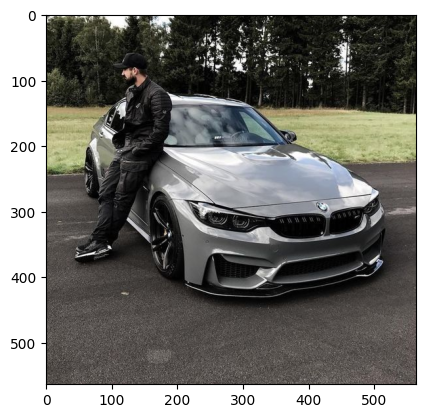

In [11]:
# plt.imshow(img)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)


In [13]:
print(ClassIndex)

[1 3]


In [14]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]-10,boxes[1]+10),font,fontScale=font_scale,color=(0,255,0),thickness=2)

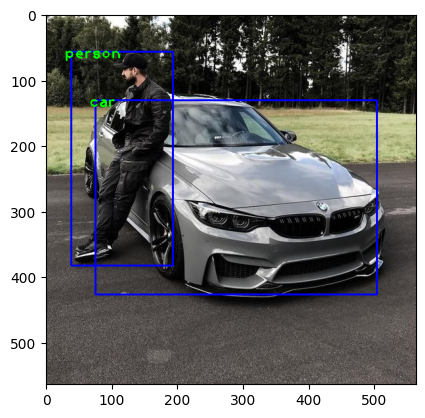

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video Demo

In [16]:
cap = cv2.VideoCapture('vid1.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open video source")

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Run detection on frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (x, y - 10), font,
                            fontScale=font_scale, color=(0, 255, 0), thickness=2)
    
    cv2.imshow('OBJECT DETECTION', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()       

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [18]:
!jupyter nbconvert --to script detect.ipynb


[NbConvertApp] Converting notebook detect.ipynb to script
[NbConvertApp] Writing 2387 bytes to detect.py
